<a href="https://colab.research.google.com/github/Kale15-chaitanya/Python_Skills/blob/main/diabetes_prediction_using_advanced_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Exploration

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.value_counts('Outcome')

Outcome
0    500
1    268
dtype: int64

# Data Vizualization

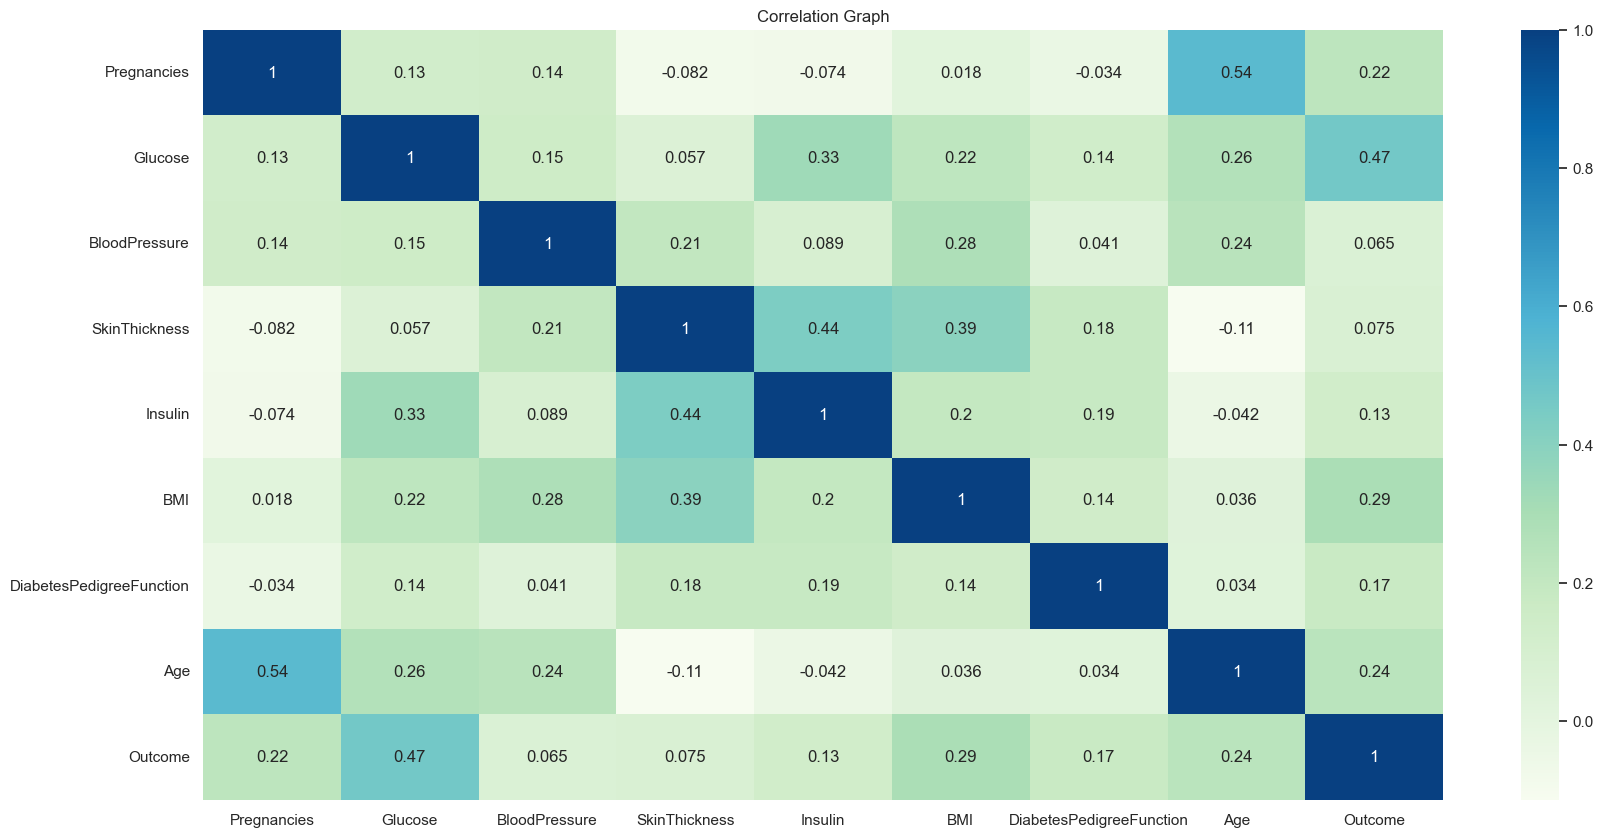

In [ ]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

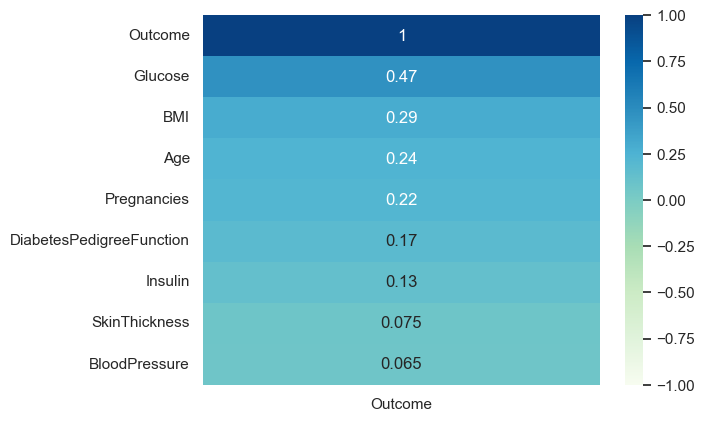

In [ ]:
# Plotting the heatmap to check the correlation between the Target Label and other features
sns.heatmap(df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

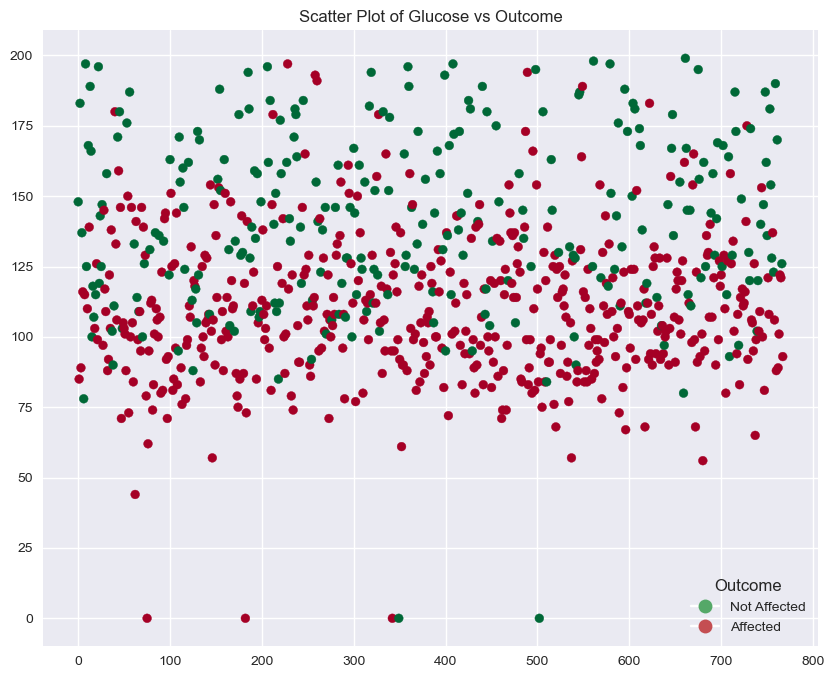

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df.index, df['Glucose'], c=df['Outcome'], cmap='RdYlGn', s=40)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Not Affected'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Affected')]

ax.legend(handles=legend_elements, title='Outcome')

ax.set_title('Scatter Plot of Glucose vs Outcome')

plt.show()

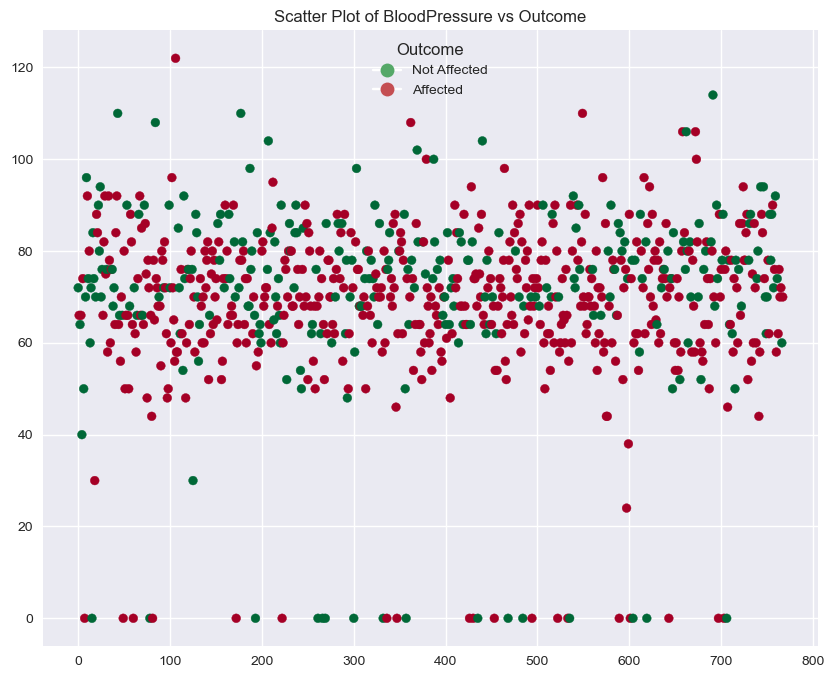

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df.index, df['BloodPressure'], c=df['Outcome'], cmap='RdYlGn', s=40)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Not Affected'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Affected')]

ax.legend(handles=legend_elements, title='Outcome')

ax.set_title('Scatter Plot of BloodPressure vs Outcome')

plt.show()

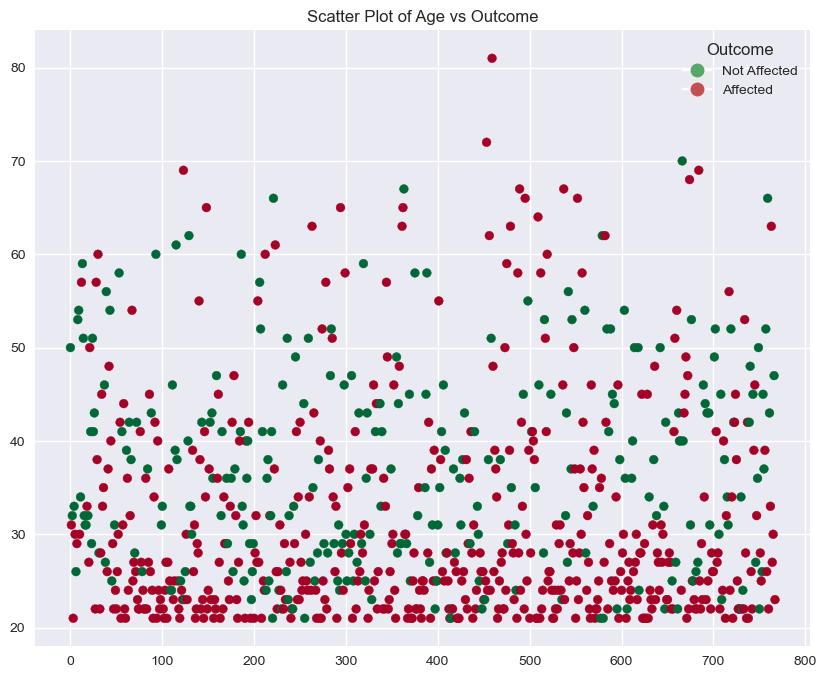

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df.index, df['Age'], c=df['Outcome'], cmap='RdYlGn', s=40)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Not Affected'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Affected')]

ax.legend(handles=legend_elements, title='Outcome')

ax.set_title('Scatter Plot of Age vs Outcome')

plt.show()

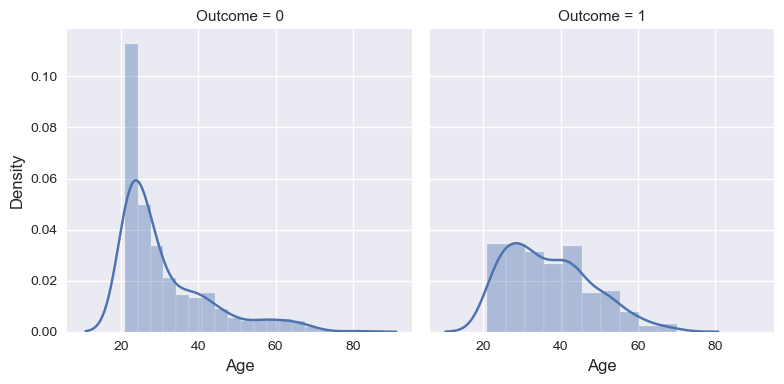

In [ ]:
sea = sns.FacetGrid(df, col = "Outcome", height = 4)
sea.map(sns.distplot, "Age")

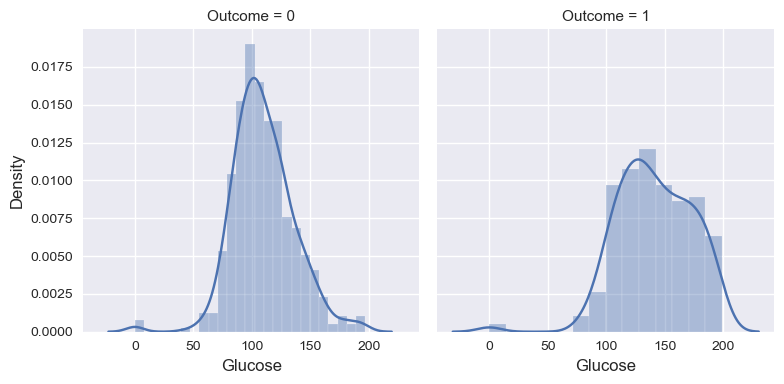

In [ ]:
sea = sns.FacetGrid(df, col = "Outcome", height = 4)
sea.map(sns.distplot, "Glucose")

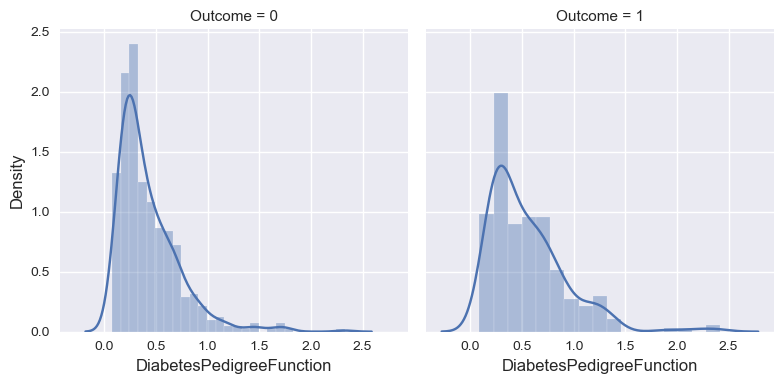

In [ ]:
sea = sns.FacetGrid(df, col = "Outcome", height = 4)
sea.map(sns.distplot, "DiabetesPedigreeFunction")

# Data Preprocessing

In [ ]:
#Before Train Test Split, split X(Input) & y(target) from the original Dataframe

X = df.drop(['Outcome'], axis = 'columns')
y = df['Outcome']

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_train.value_counts()

0    401
1    213
Name: Outcome, dtype: int64

In [ ]:
y_test.value_counts()

0    99
1    55
Name: Outcome, dtype: int64

In [ ]:
#Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new_scaled = scaler.fit_transform(X_train)
X_test_new_scaled = scaler.transform(X_test)

In [ ]:
#Applying Principal Component Analysis (PCA) for dimentionality Reduction

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_new_scaled)
X_test_pca = pca.transform(X_test_new_scaled)

In [ ]:
# Class Imbalance handling Using SMOTEENN

from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train_pca, y_train)
X_test_resampled, y_test_resampled = smoteenn.fit_resample(X_test_pca, y_test)

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

((475, 7), (475,))

In [ ]:
X_test_resampled.shape, y_test_resampled.shape

((105, 7), (105,))

In [ ]:
y_train_resampled.value_counts()

1    268
0    207
Name: Outcome, dtype: int64

In [ ]:
y_test_resampled.value_counts()

1    64
0    41
Name: Outcome, dtype: int64

# Model Training and Evaluation

In [ ]:
#Import Necessary Algorithm for train the model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
bnb_model = BernoulliNB()
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()

In [ ]:
models = [
    log_model,
    dt_model,
    rf_model,
    svm_model,
    bnb_model,
    knn_model,
    ada_model
]

In [ ]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate_models(models, X, y, cv):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        cv_scores = cross_val_score(model, X, y, cv=cv)
        scores[model_name] = cv_scores.mean()
    return scores

In [ ]:
cv_scores = train_and_evaluate_models(models, X_train_resampled, y_train_resampled, 15)

In [ ]:
# Assuming 'scores' is the dictionary of scores
CV_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['Cross_Validation_Score'])

# Display the DataFrame
print(CV_scores_df)

                        Cross_Validation_Score
LogisticRegression                    0.913508
DecisionTreeClassifier                0.913508
RandomForestClassifier                0.949261
SVC                                   0.949328
BernoulliNB                           0.863105
KNeighborsClassifier                  0.953562
AdaBoostClassifier                    0.936761


In [ ]:
best_models = [
    log_model,
    dt_model,
    rf_model,
    svm_model,
    bnb_model,
    knn_model,
    ada_model
]

In [ ]:
from sklearn.metrics import accuracy_score

def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        scores[model_name] = {
            accuracy
        }
    return scores

In [ ]:
scores = train_and_evaluate_models(best_models, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

In [ ]:
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy Score'])


print(scores_df)

                        Accuracy Score
LogisticRegression            0.838095
DecisionTreeClassifier        0.857143
RandomForestClassifier        0.857143
SVC                           0.885714
BernoulliNB                   0.733333
KNeighborsClassifier          0.847619
AdaBoostClassifier            0.800000


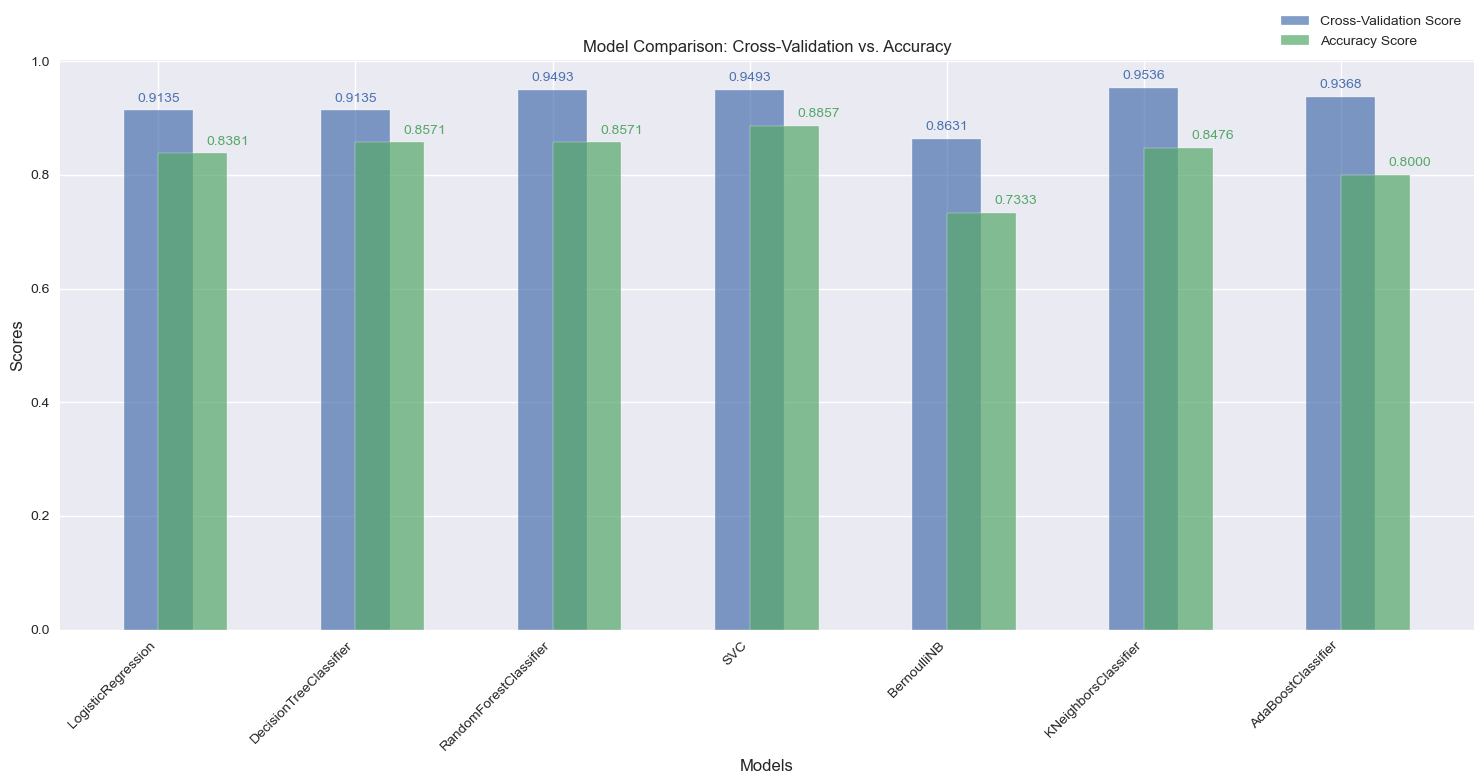

In [ ]:
plt.figure(figsize=(15, 8))
bar_width = 0.35

models = CV_scores_df.index

plt.bar(models, CV_scores_df['Cross_Validation_Score'], bar_width, label='Cross-Validation Score', color='b', alpha=0.7)
plt.bar(models, scores_df['Accuracy Score'], bar_width, label='Accuracy Score', color='g', alpha=0.7, align='edge')

for model in models:
    x_coord = models.get_loc(model)
    cv_score = CV_scores_df.loc[model, 'Cross_Validation_Score']
    accuracy_score = scores_df.loc[model, 'Accuracy Score']

    plt.text(x_coord, cv_score + 0.01, f'{cv_score:.4f}', ha='center', va='bottom', color='b', fontsize=10)
    plt.text(x_coord + bar_width, accuracy_score + 0.01, f'{accuracy_score:.4f}', ha='center', va='bottom', color='g', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Cross-Validation vs. Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [ ]:
###Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'bernoulli_nb': {
    'model': BernoulliNB(),
    'params': {
        'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
        }
    },
    'adaboost': {
    'model': AdaBoostClassifier(),
    'params': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'base_estimator': [
            DecisionTreeClassifier(max_depth=1),
            DecisionTreeClassifier(max_depth=2),
            DecisionTreeClassifier(max_depth=3)
        ],
        'algorithm': ['SAMME', 'SAMME.R'],
        'random_state': [None, 42]
        }
     }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 10, return_train_score=False)
    clf.fit(X_train_resampled, y_train_resampled)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [ ]:
tuned_df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
pd.set_option('display.max_colwidth', 1)

In [ ]:
tuned_df

,model,best_score,best_params
0,logistic_regression,0.921941,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}"
1,decision_tree,0.939007,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}"


# Final Evaluation

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
logit = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
decision = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)
randomforest = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
svm = SVC(C=10, gamma='auto', kernel='rbf', probability=True)
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
naivebayes = BernoulliNB(alpha=0.1)
adaboost = AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200, random_state=42)

In [ ]:
model_tuned = [
    logit,
    decision,
    randomforest,
    svm,
    knn,
    naivebayes,
    adaboost
]

In [ ]:
from sklearn.metrics import accuracy_score

def train_and_evaluate_models_tuned(models, X_train, y_train, X_test, y_test):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        scores[model_name] = {
            'accuracy': accuracy  # Specify the key 'accuracy' for the dictionary
        }
    return scores


In [ ]:
scores = train_and_evaluate_models_tuned(model_tuned, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)

In [ ]:
scores_tuned = pd.DataFrame(scores)


scores_tuned

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SVC,KNeighborsClassifier,BernoulliNB,AdaBoostClassifier
accuracy,0.819048,0.87619,0.904762,0.866667,0.847619,0.733333,0.885714


**Choose the best models & best parameters to Train the model using Voting_Classifer**

In [ ]:
# Create the VotingClassifier using soft/hard voting
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision),
    ('random_forest', randomforest),
    ('svm', svm),
    ('knn', knn),
    ('adaboost', adaboost)
], voting='hard')


In [ ]:
cv_scores = cross_val_score(voting_classifier, X_train_resampled, y_train_resampled, cv=5).mean()
cv_scores

0.9621052631578948

In [ ]:
voting_classifier.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=200)),
                             ('svm', SVC(C=10, gamma='auto', probability=True)),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('adaboost',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(max_depth=3),
                                                 n_estimators=200,
                                                 random_state=42))])

In [ ]:
accuracy = voting_classifier.score(X_test_resampled, y_test_resampled)
accuracy

0.9142857142857143

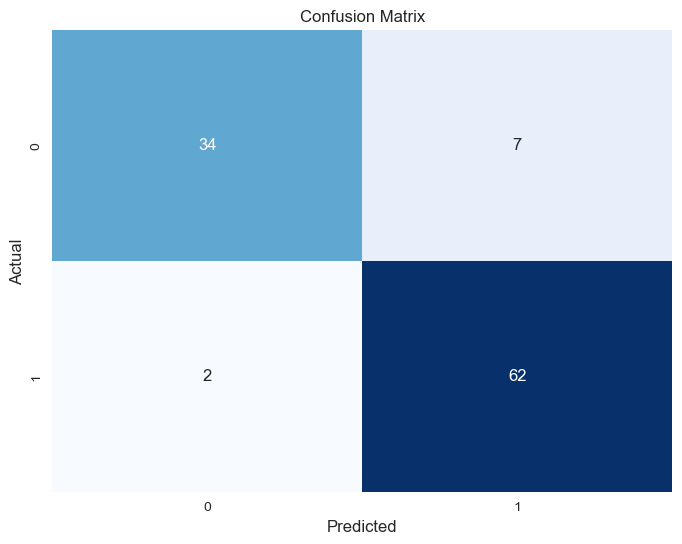

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
y_pred = voting_classifier.predict(X_test_resampled)
cm = confusion_matrix(y_test_resampled, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()